## Workbook for week2

Working on fashion MNIST

Main focus on using keras callbacks and creating separate callbacks

In [1]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
data = fashion_mnist.load_data()

In [4]:
X_train, y_train, X_test, y_test = data[0][0],data[0][1], data[1][0], data[1][1]

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [6]:
# or easily
(X_train, y_train), (X_test, y_test) = data

(28, 28)


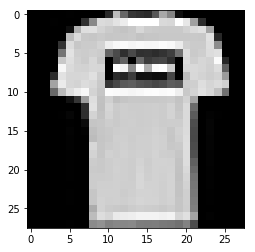

In [7]:
sample = X_train[1]
print(sample.shape)
plt.imshow(sample, cmap='gray')
# plt.imshow(sample)
plt.show()

In [8]:
X_train = X_train/255.
X_test = X_test/255.

In [9]:
# Defining model

model = keras.models.Sequential()

In [10]:
model.add(keras.layers.Flatten(input_shape=(28,28)))

In [11]:
model.add(keras.layers.Dense(128, activation=tf.nn.relu))

W0713 01:13:44.620633 140061708252992 deprecation.py:506] From /home/renjith/miniconda3/envs/py35/lib/python3.5/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [12]:
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


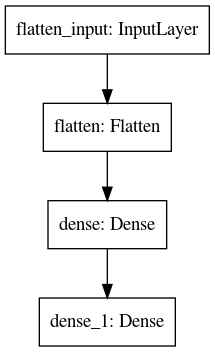

In [15]:
keras.utils.plot_model(model)

In [16]:
# model.fit(X_train, y_train, epochs=5, validation_data=(X_train, y_train))

In [17]:
# model.evaluate(X_test, y_test)

In [28]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
#     print("*"*20)
#     print(logs)
    if(logs.get('acc')>.85):
        print("\nReached 85% accuracy so cancelling training!")
        self.model.stop_training = True

callbacks = myCallback()

In [19]:
#https://keras.io/callbacks/#earlystopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                               min_delta=0.01, 
                                               patience=5, 
                                               verbose=0, 
                                               mode='min', 
                                               baseline=None, 
                                               restore_best_weights=True)

In [32]:
# https://keras.io/callbacks/#modelcheckpoint
filepath = 'model/model-{epoch:02d}.hdf5'
ckpt = keras.callbacks.ModelCheckpoint(filepath, 
                                       monitor='val_loss', 
                                       verbose=0, 
                                       save_best_only=False, 
                                       save_weights_only=False, 
                                       mode='auto', 
                                       save_freq=1)


In [33]:
history = model.fit(X_train, 
                    y_train, 
                    epochs=50, 
                    callbacks=[callbacks, ckpt], 
                    validation_split=0.25, verbose=0)


Reached 85% accuracy so cancelling training!


In [36]:
# loading only model weights
model2 = keras.models.Sequential([keras.layers.Flatten(input_shape=(28,28)), 
                                  keras.layers.Dense(128, activation=tf.nn.relu), 
                                  keras.layers.Dense(10, activation=tf.nn.softmax)])
model2.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [37]:
filepath1 = "model/model-01.hdf5"
model2.load_weights(filepath1)

In [38]:
model2.predict_classes(X_test[0:1])

array([9])

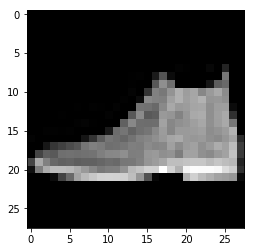

In [39]:
plt.imshow(X_test[0], cmap='gray')
plt.show()

### loading the entire model

In [40]:
from tensorflow.keras.models import load_model
model3 = load_model(filepath1)

In [41]:
model3.predict_classes(X_test[0:1])

array([9])